In [27]:
"""import the necessary libraries"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [28]:
"""read in the tweets data"""

tweets = pd.read_csv('cyberbullying_tweets.csv')
tweets.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [29]:
"""print dataset info to see dtypes and check for missing values"""
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'not_cyberbullying'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'religion'),
  Text(3, 0, 'other_cyberbullying'),
  Text(4, 0, 'age'),
  Text(5, 0, 'ethnicity')])

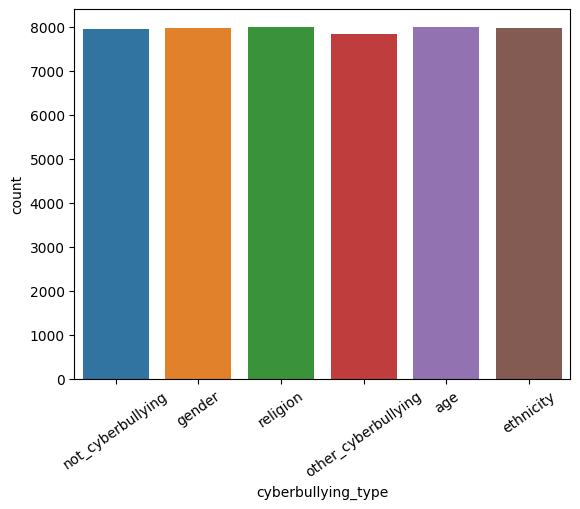

In [30]:
"""Quick EDA, check for class imbalance"""

sns.countplot(data=tweets, x=tweets['cyberbullying_type'])
plt.xticks(rotation=35)


In [31]:
"""define a functiion to clean text data"""

def clean_text(text):

    # remove all non-alphanumeric characters while preserving spaces
    text = re.sub(r'[^a-zA-Z0-9 //g]', '', text)
    # get text as a list of words
    text = text.split()
    # remove all stop words
    stop_words = set(stopwords.words("english"))
    cleaner_text = [word.lower() for word in text if word.lower() not in stop_words]
    # check the length of cleaner text, if len(cleaner_text < 50) return false
    return " ".join(cleaner_text)
   

In [32]:
"""apply the clean text function to the data"""

tweets['tweet_text'] = tweets['tweet_text'].apply(clean_text)

In [33]:
"""split the data into training, validation, and test sets"""

# get training and ttest set with sklearn train, test split functionality
train_df, test_df = train_test_split(tweets, test_size=0.3)

# take a random sample from train df to further segment into training and validation
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(33384, 2)
(7154, 2)
(7154, 2)


In [35]:
"""print some shit just to do it"""

train_df['tweet_text'][0]

'words katandandre food crapilicious mkr'